# Double bubble
In this notebook we have a look at what happens to reconstructions when two bubbles enter through
 the slice simultaneously. We use a fanbeam on the central plane. We take the same phantom (two 
 bubbles similarly shaped, next to eachother), and rotate the setup (3 sources) so that the bubbles are sometimes aligned and sometimes not.


In [1]:
from fbrct import *
from fbrct.phantom import *
from fbrct.util import *
import matplotlib.pyplot as plt

In [6]:
# We're building the linear X-Ray operator that artificially projects
# the bubble reactor onto the detector
reco_space = odl.uniform_discr(
    min_pt=[-L, -L],
    max_pt=[L, L],
    shape=[n, n])

def setup_rotated(phi):
    apart, dpart = uniform_angle_partition(offset=phi), detector_partition_2d()
    geometry = odl.tomo.FanFlatGeometry(apart, dpart, SOURCE_RADIUS, DETECTOR_RADIUS)
    xray_transform = odl.tomo.RayTransform(reco_space, geometry)

    return xray_transform


def data_rotated(phi):
    # we need a 3D geometry to simulate projection (detector) data
    dpart_3d = detector_partition_3d(DETECTOR_ROWS)
    phantom_geometry = odl.tomo.ConeFlatGeometry(uniform_angle_partition(offset=phi), dpart_3d,
                                                 SOURCE_RADIUS, DETECTOR_RADIUS)
    return generate_3d_phantom_data(PHANTOM_3D_DOUBLE_BUBBLE, L, L, n, n, phantom_geometry)


In [3]:
recon_height = int(DETECTOR_ROWS/2)
n = 100  # amount of voxels in one dimension (i.e. nxn object)
L = 10  # centimeters  -L cm to L cm in the physical space

## Two bubbles aligned on the tube-detector line 
Here, from the point of the second detector there is just one bubble. The other two detectors see two bubbles, and if you look carefully, you can see that both see one bubble as a bit bigger (because it is closer to the associated tube).

In the reconstruction one of the bubbles appears a bit compressed in the y-direction of the image. This is an effect that is due to the detector not being able to attribute the intensity in this direction of the tube properly.

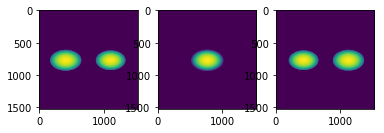

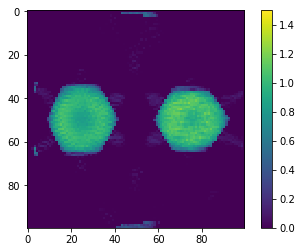

In [9]:
phi = np.pi / 3
p = data_rotated(phi)
t = 10 

h = recon_height
# take and scale the projection data
sinogram = p[t, :, :, h]
plot_sino(p[t, ...], pause=0.1)

# reconstruct iteratively
# starting vector is 0 in iteration
xray_transform = setup_rotated(phi)
x = xray_transform.domain.element(
    np.zeros(xray_transform.domain.shape))

reconstruct_filter(
    xray_transform,
    sinogram,
    x,
    niter=150,
    clip=(0, None),  # clipping values
    # fn_filter=lambda u: .1 * medians_2d(u) + .9 * u,  # median filter
    mask=circle_mask_2d(x.shape)
)

# plot results
plt.figure(2 * h)
plt.clf()
plt.imshow(x, vmax=1.5)
plt.colorbar()
plt.show()

## Two bubbles under 10 rotations 

Here we misalign the bubbles and detectors and look at the effects. In the code, we rotate the detector set-up with angles $\phi \in [0, 2\pi/6]$, because that is easier than rotating the generated phantom volume.

When two bubbles partially cross on a detector, the accuracy of the reconstruction drops somewhat, but the bubbles are still distinguishable. Especially interesting is at $\phi \approx 0.52$, Here two detectors see the overlap of two bubbles and from the detector images alone the algorithm cannot easily deduce that the bubbles are actually round everywhere. 

Angle: 0.0


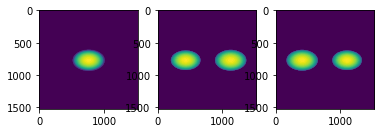

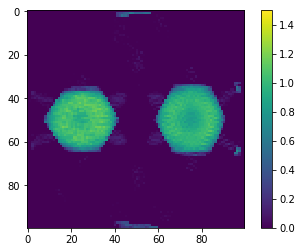

Angle: 0.10471975512


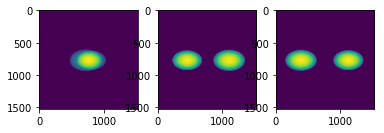

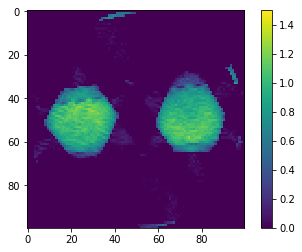

Angle: 0.209439510239


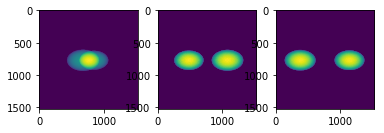

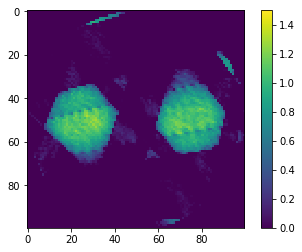

Angle: 0.314159265359


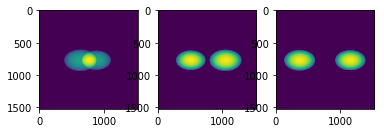

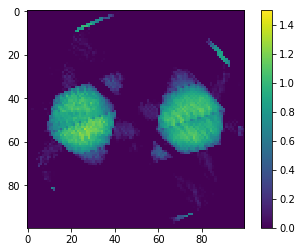

Angle: 0.418879020479


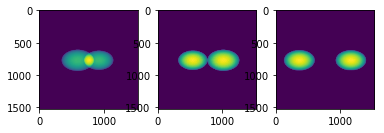

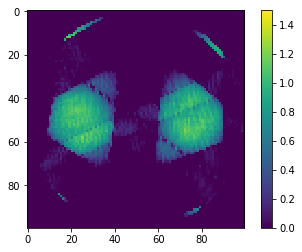

Angle: 0.523598775598


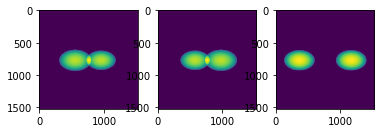

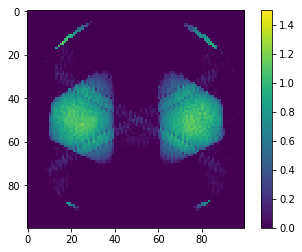

Angle: 0.628318530718


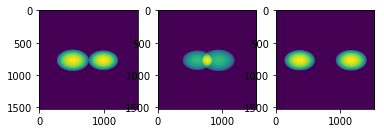

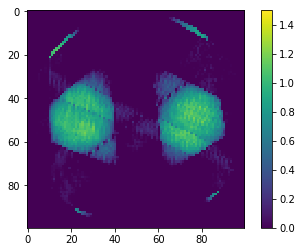

Angle: 0.733038285838


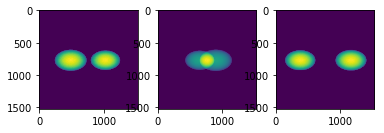

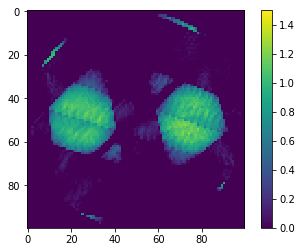

Angle: 0.837758040957


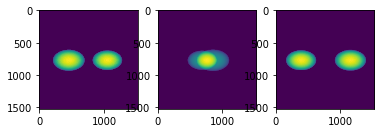

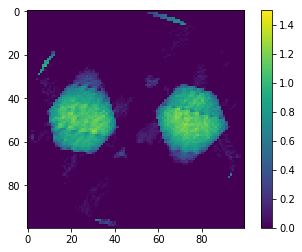

Angle: 0.942477796077


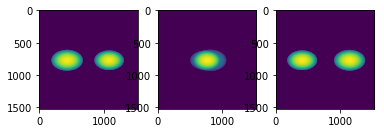

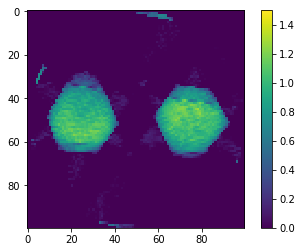

In [22]:
for phi in np.arange(0, 2*np.pi/6, 2*np.pi/6/10):
    print("Angle:", phi)
    p = data_rotated(phi)
    t = 10 

    h = recon_height
    # take and scale the projection data
    sinogram = p[t, :, :, h]
    plot_sino(p[t, ...], pause=0.1)

    # reconstruct iteratively
    # starting vector is 0 in iteration
    xray_transform = setup_rotated(phi)
    x = xray_transform.domain.element(
        np.zeros(xray_transform.domain.shape))

    reconstruct_filter(
        xray_transform,
        sinogram,
        x,
        niter=150,
        clip=(0, None),  # clipping values
        # fn_filter=lambda u: .1 * medians_2d(u) + .9 * u,  # median filter
        mask=circle_mask_2d(x.shape)
    )

    # plot results
    plt.figure(2 * h)
    plt.clf()
    plt.imshow(x, vmax=1.5)
    plt.colorbar()
    plt.show()

### Pushing the iterations
It is always a good idea to check if we can better results when we push the amount of iterations 
a bit more here. We add some iterations with the median filter to smooth a bit.

This surpresses the artifacts a bit, not completely. It is interesting to see that the bubbles have spots of lower intensity, I'm not entirely sure why we get this effect.

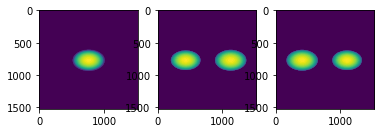

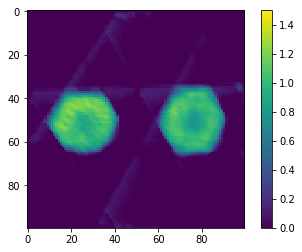

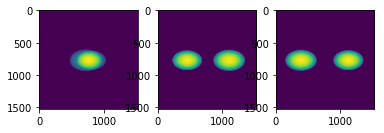

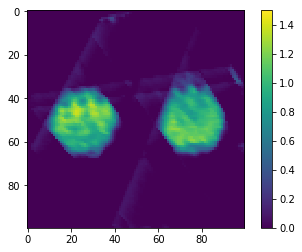

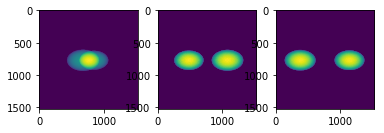

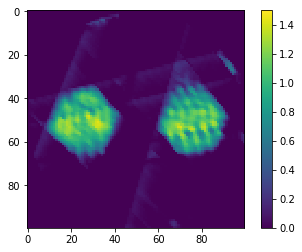

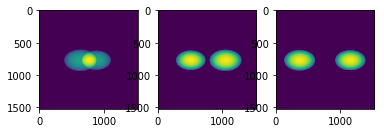

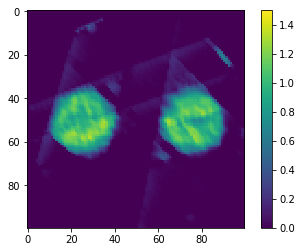

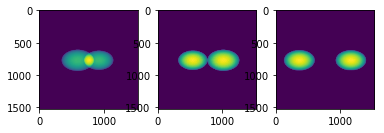

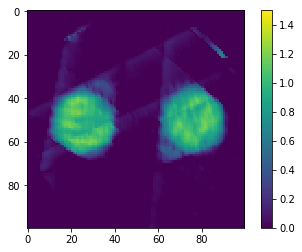

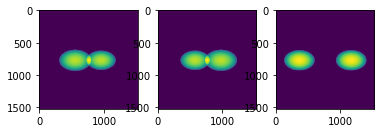

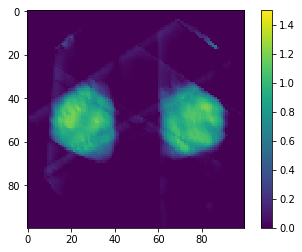

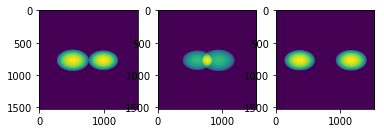

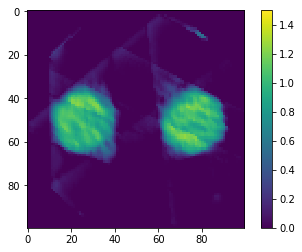

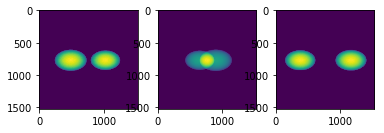

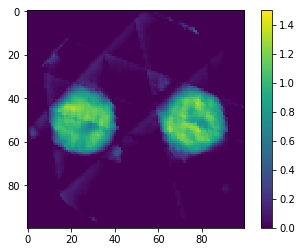

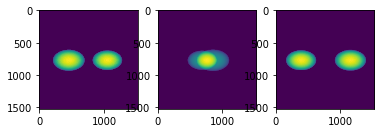

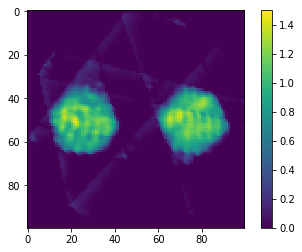

In [ ]:
for phi in np.arange(0, 2*np.pi/6, 2*np.pi/6/10):
    p = data_rotated(phi)
    t = 10 

    h = recon_height
    # take and scale the projection data
    sinogram = p[t, :, :, h]
    plot_sino(p[t, ...], pause=0.1)

    # reconstruct iteratively
    # starting vector is 0 in iteration
    xray_transform = setup_rotated(phi)
    x = xray_transform.domain.element(
        np.zeros(xray_transform.domain.shape))

    reconstruct_filter(
        xray_transform,
        sinogram,
        x,
        niter=1000,
        clip=(0, None),  # clipping values
        # fn_filter=lambda u: .1 * medians_2d(u) + .9 * u,  # median filter
        mask=circle_mask_2d(x.shape)
    )
    
    reconstruct_filter(
        xray_transform,
        sinogram,
        x,
        niter=30,
        clip=(0, None),  # clipping values
        fn_filter=lambda u: .1 * medians_2d(u) + .9 * u,  # median filter
        mask=circle_mask_2d(x.shape)
    )

    # plot results
    plt.figure(2 * h)
    plt.clf()
    plt.imshow(x, vmax=1.5)
    plt.colorbar()
    plt.show()